# Appendix

Here, you'll find a few bonus sections, including :

* Explanation on Convolutional Neural Networks (CNNs) and their different layers
* A "Going further" part
* A BONUS exercise

# Convolutional Neural Network

Convolutional Neural Network is a kind of neural network that proved to be very effective, especially on images.

Such a network contains many layers that are stacked on top of eachother to form a *deep neural network*.

#### What's a layer

Layers can be considered as the building blocks of a neural network. They're the stages by which the input will go through.

A layer, is simply a block that takes inputs and outputs something, nothing too fancy. Many different types of layers exist.

Here we'll go through a few layers that are usually needed to make an acceptable autoencoder.

#### Convolutions

The encoder tries to encode the input to a smaller space. So how can this be done ?

Well, we use what we call **convolutional** operations. What these operations actually do, is define a **filter**, that is a matrix and output a value whenever this matrix is applied on a part of an image.

In the following image, the static blue part is the <span style="color:blue">**4x4 input**</span> (can be an image, a part of it or anything really) on which we apply the moving blue <span style="color:darkblue">**filter**</span>.

Each time we apply this filter somewhere, a single value is <span style="color:darkgreen">**output**</span>. This produces the final <span style="color:lightgreen">**2x2 output**</span>.

<img src="images/no_padding_no_strides.gif"/>

Of course, these filters can be of any size, it depends on the needs (performance wanted, results, etc). Usual sizes could be 1x1, 3x3, 5x5 and even more.

There a few other parameters to make more elaborate convolution filters, like depth, stride, size, padding, etc. This can be left as a research exercise to the reader.

One question would be, how can we find these **filters**, must be difficult right ?

That's what training is all about. You just decide on the few parameters cited above (depth, stride, size, padding, etc) by hand and let the training find the best filter for your data. *Pretty simple in fact*.

#### Pooling

The Pooling layer is used to reduce the size of its input. You can define by how much the size is decreased and the operation  that is done to decrease the input.

There are several operations that can be done to decrease the size of an input :

* Max
* Average
* L2 norm
* *Etc...*

Here we'll mostly be using the Max Pooling, which just takes the max element from the current window it's looking at.

<img src="images/pool.png"/ width=400px>

For example, consider that each group of color in the left image is a **window** the max operation is going to be applyied to.

So we see, that we just take the maximum value of each **window** and this reduces the size of our input by half in the case of a **2x2 window**.

In fact, usually **2x2 windows** are mostly used.

If you noticed, here there's nothing to be learned, as the max operation is fixed and we just set the window size by hand.

#### Upsampling

Upsampling is the reverse operation, which just repeats the elements a number of time to match the increase factor that was given to it.

You can see this as a simple upscaling.

Like the Pooling layer, nothing needs to be learned here, just set the parameters (upscale factor) by hand.

#### Dropout

The dropout layer is a particular layer which will just **deactivate random neurons** of the network... Why would anyone want to do that ?

Let's say that your network tries to learn a lot of data and by some time, it starts to have "specialized" neurons for particular patterns. This means that some neurons will just be dedicated to a particular pattern and only activate at that time.

This is not a behavior we want, because we would like to have neurons that are more general so that they can adapt better to data they've never seen.

So by **deactivating random neurons** you tell some other neurons to compensate for these deactivated neuron's jobs so that every neurons knows to adapt better when unexpected situations like that happen (new and never seen data on inference).

This is in fact a nice way of saying to some neurons to stop specializing and just start to be more autonomous.

So a dropout just takes a probability of the proportion of neurons we want to drop. For example $0.5$ says that we want to drop half neurons in a random manner.

#### Merge layers

Merge layers are simple layers which take as input the output of 2 or more layers and performs a simple operation on them.

The operations that can be performed are, for example :

* Add
* Substract
* Multiply
* Average
* *Anything you can come up with really...*

# Going even further in Super Resolution

This course should be considered as an introduction to super resolution using Autoencoders. This means that a few breakthrough have been already done that are even more impressive.

In fact, Autoencoders learn a distribution comparing its input to its output, this is good for learning the representations of our data, but is pretty bad for generating new data. Also, because Autoencoders learn an averaged representation of the data (the smaller space) thus the output becomes pretty blurry compared to a perfectly scaled image. 

This means that here, we tricked our Autoencoders into trying and doing something they're not the best at.

Then, what kind of network is better suited at this kind of task ?

## Generative Adversarial Networks

GANs use another network, called a Discriminator, to measure the distance/difference between the data we generate and the real data. It takes an input image and returns a number between 0 and 1, where 0 means the data is fake and 1 that it is real. The Generator's goal then is to learn to convince the Discriminator that it is generating real images.

This new method is way more efficient, see for yourself :

<img src="images/lena_low.png" width=250px/>

And scale 4x with a GAN :

<img src="images/lena_gan.png" width=250px/>

*Source: [Photo-Realistic Single Image Super-Resolution Using a Generative Adversarial
Network](https://arxiv.org/pdf/1609.04802v5.pdf) (check it out if you want to see more state of the art results)*

## Variational Autoencoders

As well, there is actually a variation of Autoencoders, called **Variational Autoencoders (VAEs)** which are generative models, meaning they can actually generate data as opposed to classical Autoencoders. This new data is generated from what was seen before, this means that this kind of network can actually create new things. For example, make it learn fonts and it could generate new fonts, as opposed to classical Autoencoders.

VAEs are generative autoencoders, meaning they can generate new instances that look similar to original dataset used for training.
    
VAEs learns the probability distribution of the data while autoencoders learns a function to map each input to a smaller space and decoder learns the reverse mapping in a lossy way that we take advantage of.

The important thing is that while learning the probability distribution, VAEs will also try to make it so that the distribution looks like a gaussian. 

*Seems complicated ?*

Let's say that you want your data distribution to always look like that :

<img src="images/gauss.png"/>

You'll just make it so that your data you use for training (<span style="color:blue">**blue dots**</span>) will be in a space where your data always forms such a shape.

This means that you'll be able to just take new data points (<span style="color:red">**red dots**</span>) on this space that you already know the shape of, and this will just generate something new that could be though of as an interpolation or something in between your other learned data points (<span style="color:blue">**blue dots**</span>).

So, if your datapoints are, let's say fonts, you could easily generate new ones by using intermediary points.

In the end, this just shows that a network capable of generating and not just "recreating" is more suited to such tasks as what we want in super resolution is to generate new details.

# BONUS Exercise (with a solution): Arbitrary resolution input image

Let's say you would want to change the network a tiny bit to be able to support arbitrary sized resolutions without resizing weirdly all the images, what would you do ?

That part is there for you to try and figure out what you could do to add support for this. **It's optional, of course**.

<details> <summary>**Hint:**</summary> *You can do it.*</details>

<details> <summary>**HInt 2:**</summary> *Try breaking/cutting down the image*</details>

In [ ]:
# Try something first and then look at the solution





















## A possible solution:

Here, we just change the input image size to 32x32. Why ?

Well, we just chose to cut our images into 32x32 patches. This means that we ne longer train a pair of low res image and high res image, but rather a low res 32x32 path and a high res 32x32 patch. This means that to train our images from above, we'll just cut them and feed the network these patches one after another.

This is what the network looks like :

In [1]:
# Imports
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Dropout, Conv2DTranspose, UpSampling2D, add
from keras.models import Model
from keras import regularizers

c:\users\cdimachkie\appdata\local\continuum\anaconda3\envs\tensorflow-gpu-3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
n = 32 # This is literally the only change
chan = 3
input_img = Input(shape=(n, n, chan))
l1 = Conv2D(64, (3, 3), padding='same', activation='relu', activity_regularizer=regularizers.l1(10e-10))(input_img)
l2 = Conv2D(64, (3, 3), padding='same', activation='relu', activity_regularizer=regularizers.l1(10e-10))(l1)

l3 = MaxPooling2D(padding='same')(l2)
l3 = Dropout(0.3)(l3)
l4 = Conv2D(128, (3, 3),  padding='same', activation='relu', activity_regularizer=regularizers.l1(10e-10))(l3)
l5 = Conv2D(128, (3, 3), padding='same', activation='relu', activity_regularizer=regularizers.l1(10e-10))(l4)

l6 = MaxPooling2D(padding='same')(l5)
l3 = Dropout(0.5)(l3)
l7 = Conv2D(256, (3, 3), padding='same', activation='relu', activity_regularizer=regularizers.l1(10e-10))(l6)

l8 = UpSampling2D()(l7)

l9 = Conv2D(128, (3, 3), padding='same', activation='relu', activity_regularizer=regularizers.l1(10e-10))(l8)
l10 = Conv2D(128, (3, 3), padding='same', activation='relu', activity_regularizer=regularizers.l1(10e-10))(l9)

l11 = add([l5, l10])
l12 = UpSampling2D()(l11)
l3 = Dropout(0.3)(l3)
l13 = Conv2D(64, (3, 3), padding='same', activation='relu', activity_regularizer=regularizers.l1(10e-10))(l12)
l14 = Conv2D(64, (3, 3), padding='same', activation='relu', activity_regularizer=regularizers.l1(10e-10))(l13)

l15 = add([l14, l2])
decoded = Conv2D(chan, (3, 3), padding='same', activation='relu', activity_regularizer=regularizers.l1(10e-10))(l15)

autoencoder = Model(input_img, decoded)

In [3]:
autoencoder.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 64)   1792        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 64)   36928       conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 16, 16, 64)   0           conv2d_2[0][0]                   
__________________________________________________________________________________________________
dropout_1 

Let's compile the model and use the previous MSE loss :

In [4]:
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

Here, we modify our function that loads/train the model to account for these patches :

In [11]:
import os
import re
from scipy import ndimage, misc
from skimage.transform import resize, rescale
from skimage.util import view_as_windows
import matplotlib.pyplot as plt
import numpy as np

def train_batches(only_load_dataset=False):

    batches = 256

    batch = 0
    batch_nb = 0

    max_batches = -1
    
    ep = 4

    images = []
    x_train_n = []
    x_train_down = []
    
    x_train_n2 = []
    x_train_down2 = []

    for root, dirnames, filenames in os.walk("cars_train"):
        for filename in filenames:
            if re.search("\.(jpg|jpeg|JPEG|png|bmp|tiff)$", filename):
                if batch_nb == max_batches:
                    return x_train_n2, x_train_down2
                filepath = os.path.join(root, filename)
                image = pyplot.imread(filepath)
                if len(image.shape) > 2:

                    img_resized = resize(image, (256, 256))
                    img_rescaled = rescale(rescale(img_resized, 0.5), 2.0)
                    for i in range(8):
                        for j in range(8):
                            x_train_n.append(img_resized[i*32:(i+1)*32, j*32:(j+1)*32, :3])
                            x_train_down.append(img_rescaled[i*32:(i+1)*32, j*32:(j+1)*32, :3])

                    batch += 1
                    if batch == batches:
                        batch_nb += 1

                        x_train_n2 = np.array(x_train_n)
                        x_train_down2 = np.array(x_train_down)
                        
                        if only_load_dataset:
                            return x_train_n2, x_train_down2

                        print('Training batch', batch_nb, '(', batches, ')')

                        autoencoder.fit(x_train_down2, x_train_down2,
                            epochs=ep,
                            shuffle=True)

                        x_train_n = []
                        x_train_down = []
                    
                        batch = 0
    
    return x_train_n2, x_train_down2

If you want to train it yourself :

```Python
x_train_n = []
x_train_down = []
x_train_n, x_train_down = train_batches()
```

But, let's load the dataset and weights which is faster :

In [6]:
x_train_n = []
x_train_down = []
x_train_n, x_train_down = train_batches(True)

c:\users\cdimachkie\appdata\local\continuum\anaconda3\envs\tensorflow-gpu-3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [7]:
autoencoder.load_weights("sr.img_net.mse.final_model5.patch.weights.best.hdf5")

## Display the results

Let's first feed the network our data and see what it generates : 

In [8]:
sr_patch = np.clip(autoencoder.predict(x_train_down), 0.0, 1.0)

We feed our network with our cut images and it gives us back many small 32x32 patches :

In [9]:
image_index = 30 # You can play with this variable

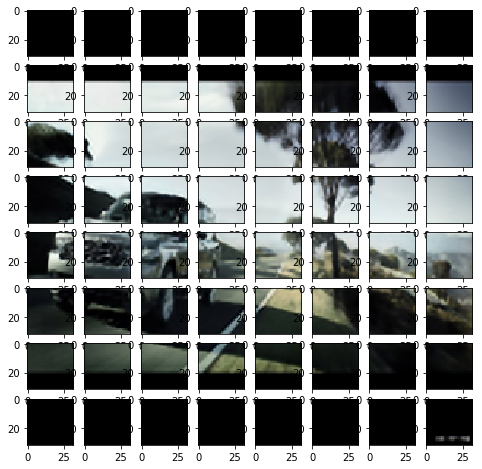

In [12]:
plt.figure(figsize=(8, 8))
i = 1
nb_rows = (int)(256 / 32)
for j in range(8):
    for k in range(8):
        ax = plt.subplot(8, 8, i)
        plt.imshow(sr_patch[(int)(nb_rows * nb_rows) * image_index + k + j * nb_rows])
        i += 1
plt.show()

Here, we create a function to patch our patches together when we want to display the final results :

In [13]:
def create_image(imgs, img_id, size, patch_size):
    img = np.zeros((size * patch_size, size * patch_size, 3))
    for i in range(size):
        for j in range(size):
            img[i*patch_size:(i+1)*patch_size, j*patch_size:(j+1)*patch_size, :3] = imgs[img_id * size * size + i * size + j]

    return img

As we can see below, this works as before

In [14]:
image_index = 30

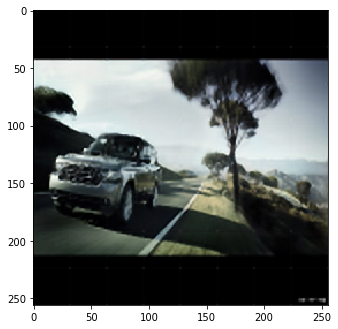

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(64, 64))
ax = plt.subplot(10, 10, 1)
plt.imshow(create_image(sr_patch, image_index, 8, 32))
plt.show()

As we can see, this quick solution works. But even if we look closely, we can see some kind of checkerboard pattern because we loose information if we don't treat the image as a whole.

### BONUS : Find a way to make the checkerboard effect less visible